<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Model Development & Evaluation**](#Section7)<br>
**8.** [**Conclusion**](#Section8)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Kmeans is an **supervised**, **iterative**, **partition-based** clustering algorithm.

- It tries to partition the dataset into **K pre-defined** distinct, **non-overlapping subgroups** (clusters).

- It **assigns** data points to a cluster such that the **sum of the squared distance** is at the **minimum**.

<center><img src="https://iliazaitsev.me/static/images/posts/clustering.gif" width=30%></center>

- Sum of the squared distance is the **distance** between the **data points**and the **cluster’s centroid**.

- The **less variation** we have within clusters, the **more homogeneous** (similar) the data **points are** within the same cluster.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- It is crucial to **understand customer behaviour** and **categorise customers** based on their demography and buying behaviour.

- This is broadly one aspect of **customer segmentation**. 

- Marketers use it to **better tailor** their **marketing efforts** to **various audience subsets**.

- The subsets can be in terms of **promotional**, **marketing** and **product development** strategies.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/customer-segmentation3.jpg"></center>

**<h4>Scenario:</h4>**

- **Adshock** is an established company that **analyze customer data** for other companies and **target advertisements**.

- A local bank wants to **target** their **customers** with new promotional offers offered by the bank.

- They have **consulted Adshock** to help them find **customer groups** for the offers.

- As one of their data scientists, you are given this particular task.

- You are provided with a **dataset** that contains the **income** and **spending** of **anonymous customers**.

- Your task is to **provide a solution** that **segment** their **customers** leading them for marketing in most effective way.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

     |████████████████████████████████| 71kB 4.6MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.cluster import KMeans                                  # To instantiate KMeans model
from sklearn.preprocessing import StandardScaler                    # To import a standard scaler for scaling the features
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of **Annual Income** (in **`$`**) of approximately **300 customers** and their **Annual Spend** (in **`$`**) for a period of one year.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 303 | 2 | 2.37 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01| **INCOME** | Annual Income (in thousand `$`). |
|02| **SPEND** | Annual Spend (in thousand `$`). |


In [ ]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/CLV.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (303, 2)


,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,INCOME,SPEND
count,303.00,303.00
mean,245.27,149.65
std,48.50,22.91
min,126.00,71.00
25%,211.00,133.50
50%,240.00,153.00
75%,274.00,166.00
max,417.00,202.00


**Observations:**

- The **average** **income** of a customer is around **$245270**. 

- **Majority** of the customers have **income** less than **$274000**.

- **Income ranges** from **\$126000** upto **\$417000**.

- **Spend ranges** from **\$71000** upto **\$202000** averaging at **\$149650**.

- **Majority** of the customers **spend** more than **\$166000**.



<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


**Observations:**

- Both the columns are of **int64 datatype**.

- The datatype seem appropriate.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- The dataset has **2 features** with **303 observations**.

- There are **no missing values** present in the dataset.

- It has **7 (2.3%) duplicate rows**. We will remove these rows.

- There is **no correlation** between the 2 features.

**Performing Operations**


---
**<h4>Question 1:** Create a function that removes duplicate rows from the dataset.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the `.drop_duplicates()` method to remove the duplicates.

</details>


In [ ]:
def duplicate_removal(data=None):
  data.drop_duplicates(inplace=True)
  print('Number of duplicate rows:', data.duplicated().sum())

In [ ]:
duplicate_removal(data=data)

Number of duplicate rows: 0


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 2:** Create a function that checks the distribution of the INCOME feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure.

- Plot a box using the `sns.boxplot` method for the 'INCOME' feature.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def income_plot(data=None, column=None):
  #Create a figure of 15 x 7 inches
  fig = plt.figure(figsize=(15, 7))

  # Create a boxplot for INCOME
  sns.boxplot(x=column, data=data, showmeans=True, palette='Blues')

  # Add cosmetics
  plt.xlabel(xlabel=column, fontsize=14)
  plt.xticks(fontsize=12)
  plt.title(label='Distribution of INCOME (in $xk)', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

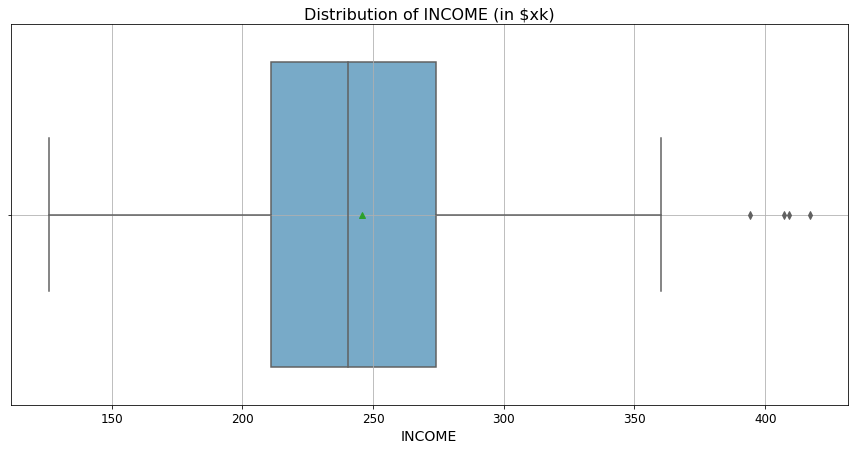

In [ ]:
income_plot(data=data, column='INCOME')

**Observations:**

- The **IQR** is more **tightly packed** whereas the whiskers seem to be more spread out.

- There are **4 outliers** as well in the feature.


---
**<h4>Question 3:** Create a function that checks the distribution of the SPEND feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure.

- Plot a box using the `sns.histplot` method for the 'SPEND' feature and keep kde=True.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def spend_plot(data=None, column=None):
  #Create a figure of 15 x 7 inches
  fig = plt.figure(figsize=(15, 7))

  # Create a histplot for SPEND
  sns.histplot(x=column, data=data, kde=True, color='green')

  # Add cosmetics
  plt.xlabel(xlabel=column, fontsize=14)
  plt.ylabel(ylabel='Count', fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='Distribution of SPEND (in $xk)', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

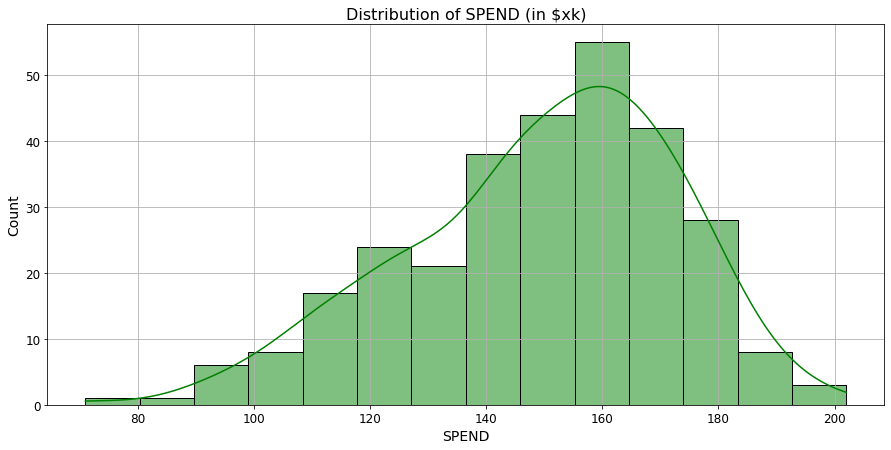

In [ ]:
spend_plot(data=data, column='SPEND')

**Observations:**

- The distribution is **slightly left skewed** due to spendings **less than \$100000**.


---
**<h4>Question 4:** Create a function that compare INCOME and SPEND features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x10 inches figure.

- Plot a box using the `sns.scatterplot` method for the 'INCOME' and 'SPEND' features.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def compare_plot(data=None, column1=None, column2=None):
  #Create a figure of 15 x 10 inches
  fig = plt.figure(figsize=(15, 10))

  # Create a scatterplot for INCOME and SPEND
  sns.scatterplot(x=column1, y=column2, data=data, color='#ff6361', edgecolor='black', s=150)

  # Add cosmetics
  plt.xlabel(xlabel=column1, fontsize=14)
  plt.ylabel(ylabel=column2, fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='INCOME vs SPEND (in $xk)', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

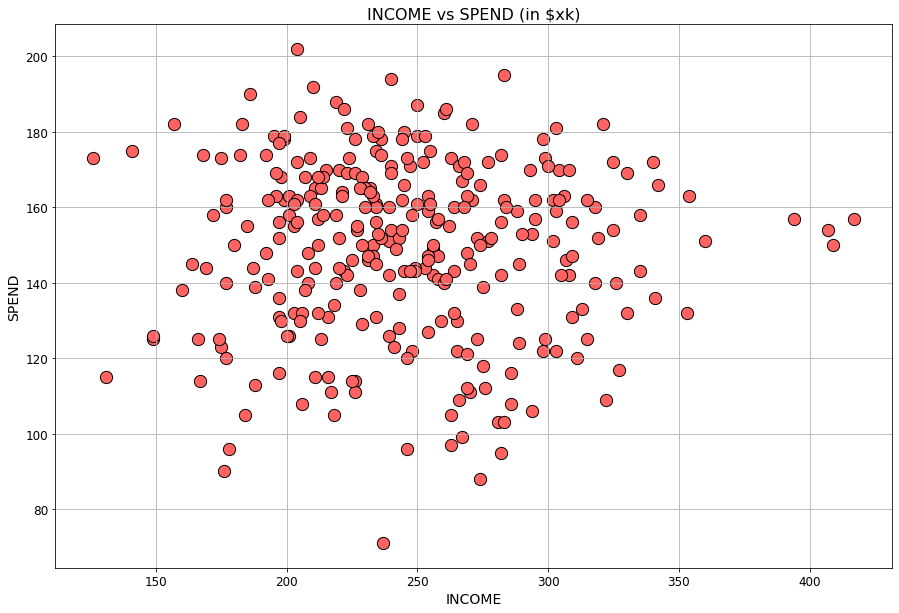

In [ ]:
compare_plot(data=data, column1='INCOME', column2='SPEND')

**Observations:**

- The features are **not correlated** to each other.

<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will apply K-Means clustering to our customer data.

- We will find the best number of clusters using the elbow plot analysis.


---
**<h4>Question 5:** Create a function that initializes a KMeans clustering model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `n_clusters=k`, `random_state=42`, and `n_jobs=-1` for initialization.

- Set a k parameter in the calling function that assigns the value to `n_clusters`

</details>


In [ ]:
def model_initialize(k=None):
  return KMeans(n_clusters=k, random_state=42, n_jobs=-1)

In [ ]:
k_means = model_initialize(k=2)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


---
**<h4>Question 6:** Create a function that applies KMeans clustering on the given data.</h4>

---

<details>

**<summary>Hint:</summary>**

- 

</details>


In [ ]:
def form_clusters(k_model=None):
  k_model.fit(data)
  print('Inertia for the given set of clusters:', k_model.inertia_)
  return k_model

In [ ]:
k_model=form_clusters(k_model=k_means)

Inertia for the given set of clusters: 411856.71206353686



---
**<h4>Question 7:** Create a function that extracts the cluster centers and the cluster labels for each observation in the data.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `.cluster_centers_` to extract the cluster centers.

- Use `k_model.labels_` and merge it with the dataset as a `'Labels'` column.

</details>


In [ ]:
def center_n_labels(k_model=None, data=None):
  centers = k_model.cluster_centers_
  data['Labels'] = k_model.labels_
  return data, centers

In [ ]:
data, centers = center_n_labels(k_model=k_model, data=data)
data.head()

,INCOME,SPEND,Labels
0,233,150,1
1,250,187,1
2,204,172,1
3,236,178,1
4,354,163,0



---
**<h4>Question 8:** Create a function that plots the clusters along with the cluster centers.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x10 inches figure.

- Plot a box using the `sns.scatterplot` method for the 'INCOME' and 'SPEND' features and use 'Labels' as hue.

- Plot the cluster centers using plt.plot() and assign a unique marker to them (say 'P' or '+' or '*').

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def cluster_plot():
  #Create a figure of 15 x 10 inches
  fig = plt.figure(figsize=(15, 10))

  # Create a scatterplot for INCOME and SPEND
  sns.scatterplot(x='INCOME', y='SPEND', data=data, hue='Labels', edgecolor='black', s=100, palette='rocket')
  plt.scatter(x=centers[:, 0], y=centers[:, 1], marker='P', edgecolor='black', s=150, c='yellow')

  # Add cosmetics
  plt.xlabel(xlabel='INCOME', fontsize=14)
  plt.ylabel(ylabel='SPEND', fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='Clusters', fontsize=16)
  plt.legend()
  plt.grid(b=True)

  # Display the output
  plt.show()

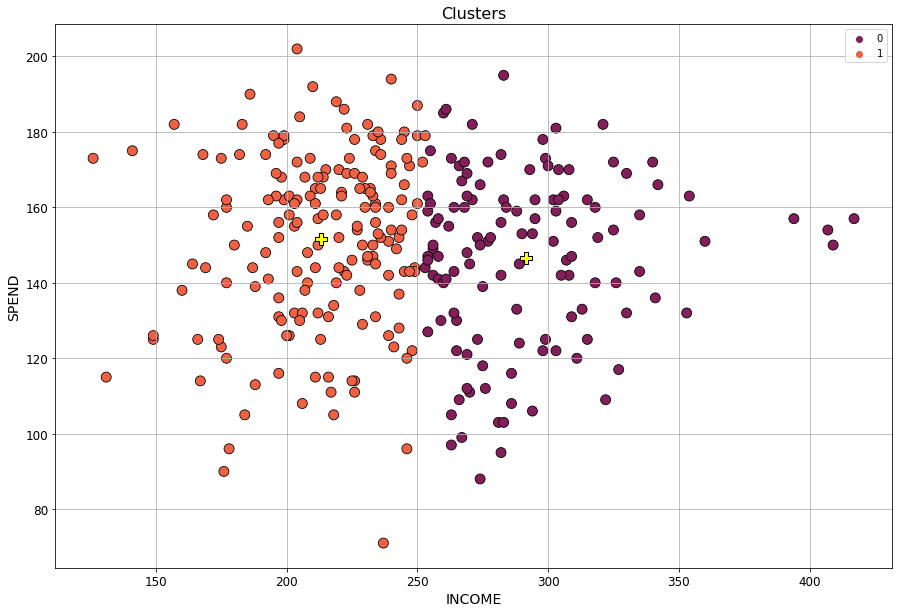

In [ ]:
cluster_plot()

**Observations:**

- We can see our clusters in the above plot.


---
**<h4>Question 9:** Create a function that runs multiple iterations of K-Means for different values of K and calculate inertia for each cluster group.</h4>

---

<details>

**<summary>Hint:</summary>**

- 

</details>


In [ ]:
def k_means_iterations(data=None):
  inertia_vals = []
  K_vals = [x for x in range(1, 16)]

  for i in K_vals:
    k_model_n = KMeans(n_clusters=i, random_state=42, n_jobs=-1)
    k_model_n.fit(data)
    inertia_vals.append(k_model_n.inertia_)
  return inertia_vals

In [ ]:
inertia_vals = k_means_iterations(data=data)


---
**<h4>Question 10:** Create a function that plots an elbow plot to check the optimal value of K with respect to inertia of clusters.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inches figure.

- Use plt.plot() method to plot values of k and the corresponding inertia values.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for labels as 14, for ticks as 12, and title as 16.

- Use `plt.show()` to properly display the plot.

</details>


In [ ]:
def plot_interia(inertia_vals=None):
  #Create a figure of 15 x 7 inches
  fig = plt.figure(figsize=(15, 7))

  # Plotting values of k and the inertia values
  plt.plot([x for x in range(1, 16)], inertia_vals, marker='o', c='red')

  # Add cosmetics
  plt.xlabel(xlabel='K (Number of Clusters', fontsize=14)
  plt.ylabel(ylabel='Inertia', fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(label='K vs Inertia', fontsize=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

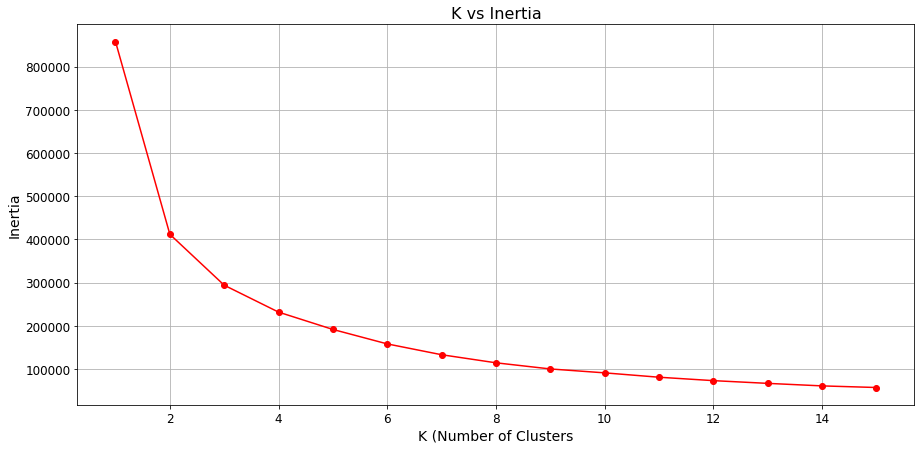

In [ ]:
plot_interia(inertia_vals=inertia_vals)

**Observations:**

- We will choose **K=5** for our final clustering.


---
**<h4>Question 11:** Use the previously written functions to create best number of clusters (selected with the elbow plot) on the given data.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use model_initialize(), form_clusters(), center_n_labels(), and cluster_plot() functions with k=best_number_of_clusters

</details>


Inertia for the given set of clusters: 191239.9267445447


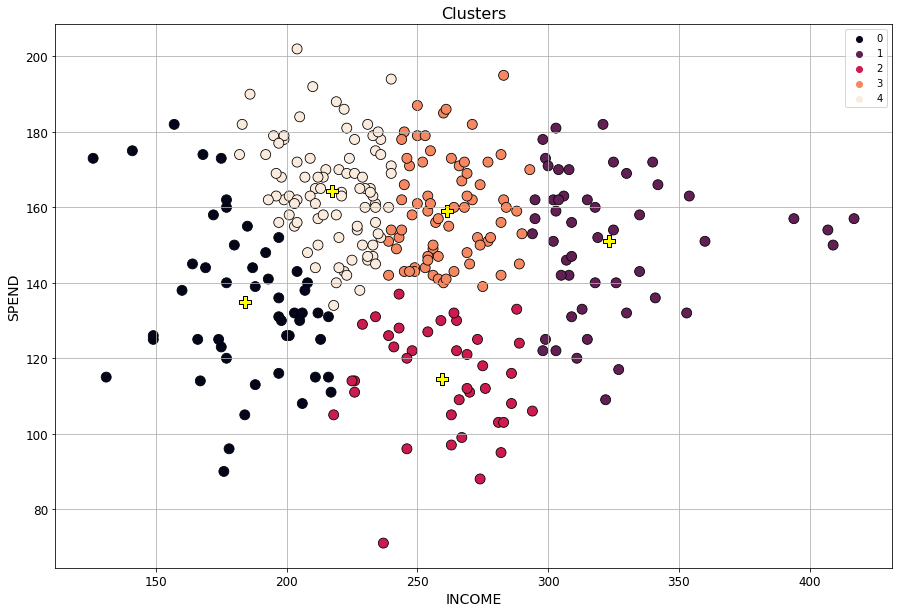

In [ ]:
k_final = model_initialize(k=5)
k_final = form_clusters(k_model=k_final)
data, centers = center_n_labels(k_model=k_final, data=data)
cluster_plot()

**Observations:**

- We can see our cluster group with K=5.

<a name = Section8></a>

---
# **8. Conclusion**
---

- We have observed that **spending habits** **don't relate** to a **customer's income**.

- Using the above generated model, we have formed **five different customer segments**.

- It takes into account their **income** and **spending** that are noted by the bank.

- **High income**, **high expense** groups can be **targeted** with some **premium plans**.

- There is a **low probability** that targeting offers to groups with **low income**, **low spending** will be effective.

- **Targeting offers** to groups with **low income**, **high spending** groups could be **arbitrary** and should be **explored** further.